## SoFi Stadium's Impact on the City of Inglewood 

#### Introduction

Historically, there has been an association between the development of sports stadiums and the social and economic impacts these projects have on the immediate community. We acknowledge that the construction of stadiums is not the sole factor for these impacts, but we understand that it does contribute to these impacts and facilitates other potential factors. For our research project, we look at the economic and social impact that the recently developed SoFi Stadium has produced on the city of Inglewood and its residents. Our research question is the following: What are the physical and demographic changes that the City of Inglewood has experienced after the Development of SoFi stadium?

The data sources used in this research come from open street maps, LA County Assessor parcel data, and Census Reporter Income data for Inglewood in 2019.

In [39]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import urllib.request, json 

import matplotlib.pyplot as plt

import osmnx as ox

The first step is importing the libraries that I will be using in this notebook. Seocond, I will be using Open Street Maps to create a building footprint map, so I need to set the address to Inglewood and tag it with building so that it brings in that information.

I want a current building footprint so that we can later compare the current building footprint with the parcel data in 2010 and 2020.

In [40]:
address = 'Inglewood, Los Angeles, CA'

In [41]:
osm = ox.geometries_from_address(address,tags={'building':True},dist=1500)

Now that I have imported that data, I can begin to explore what was imported. First, I want have a sense of how large the data is. By running the .shape command I see that it has 10,588 rows and 83 columns.

In [42]:
osm.shape

(10588, 83)

I want to see what columns are in the data so that I can then pick the columns I want to keep.

In [43]:
list(osm)

['amenity',
 'parking',
 'surface',
 'geometry',
 'nodes',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'alt_name',
 'alt_name_1',
 'building',
 'building:use',
 'ele',
 'height',
 'heritage',
 'lacounty:ain',
 'lacounty:bld_id',
 'leisure',
 'name',
 'old_name',
 'start_date',
 'website',
 'wikidata',
 'wikipedia',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'designation',
 'shop',
 'operator',
 'building:units',
 'opening_hours',
 'cuisine',
 'takeaway',
 'gnis:county_id',
 'gnis:created',
 'gnis:feature_id',
 'gnis:state_id',
 'note',
 'phone',
 'office',
 'source',
 'fixme',
 'addr:state',
 'gnis:county_name',
 'gnis:import_uuid',
 'gnis:reviewed',
 'ref',
 'tourism',
 'healthcare',
 'short_name',
 'social_facility',
 'addr:country',
 'description',
 'email',
 'smoking',
 'official_name',
 'addr:county',
 'delivery',
 'drink:beer',
 'drink:wine',
 'name:fa',
 'payment:american_express',
 'payment:apple_pay',
 'payment:cheque',
 'payment:coins',
 'paym

The only two columns I am interested in are geometry, so that I can create the map, and building so that I can create distinctions between each type of building.

In [44]:
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.sample(10)

geometry  \
element_type osmid                                                          
way          443402011  POLYGON ((-118.34158 33.93905, -118.34149 33.9...   
             440045529  POLYGON ((-118.32743 33.94779, -118.32754 33.9...   
             443435547  POLYGON ((-118.33141 33.94269, -118.33138 33.9...   
             407610968  POLYGON ((-118.32275 33.95934, -118.32275 33.9...   
             412043520  POLYGON ((-118.32084 33.94774, -118.32085 33.9...   
             440045689  POLYGON ((-118.33259 33.95590, -118.33259 33.9...   
             442338710  POLYGON ((-118.32070 33.94226, -118.32070 33.9...   
             407610884  POLYGON ((-118.32820 33.95874, -118.32820 33.9...   
             441808984  POLYGON ((-118.32518 33.94784, -118.32519 33.9...   
             442354295  POLYGON ((-118.35185 33.94195, -118.35195 33.9...   

                           building  
element_type osmid                   
way          443402011  residential  
             440045529        house  
             443435547   apartments  
             407610968        house  
             412043520        house  
             440045689        house  
             442338710        house  
             407610884        house  
             441808984        house  
             442354295  residential

I have now trimmed the data, and created a new data frame that only displays the information I want for the purpose of creating this building footprint map. I can also begin to further explore the data. For example, I want to know the count of each building type in this data, so I will run the .value_counts command for 'building.'

In [45]:
osm_building_counts = osm.building.value_counts()
osm_building_counts

house           5479
residential     1811
apartments      1464
yes              854
garage           353
retail           272
commercial       183
garages           75
hotel             36
warehouse         19
school            13
construction       8
hospital           7
industrial         7
roof               4
kindergarten       2
stadium            1
Name: building, dtype: int64

Now I know how many of each type are in the data and can create a table of this data itself.

In [46]:
type(osm_building_counts)

pandas.core.series.Series

In [47]:
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

building
house             5479
residential       1811
apartments        1464
yes                854
garage             353
retail             272
commercial         183
garages             75
hotel               36
warehouse           19
school              13
construction         8
hospital             7
industrial           7
roof                 4
kindergarten         2
stadium              1

In [48]:
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

index  building
0          house      5479
1    residential      1811
2     apartments      1464
3            yes       854
4         garage       353
5         retail       272
6     commercial       183
7        garages        75
8          hotel        36
9      warehouse        19
10        school        13
11  construction         8
12      hospital         7
13    industrial         7
14          roof         4
15  kindergarten         2
16       stadium         1

I reset the index so that I can rename the columns according to building type and the count for each building type.

In [49]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

building_type  count
0          house   5479
1    residential   1811
2     apartments   1464
3            yes    854
4         garage    353
5         retail    272
6     commercial    183
7        garages     75
8          hotel     36
9      warehouse     19
10        school     13
11  construction      8
12      hospital      7
13    industrial      7
14          roof      4
15  kindergarten      2
16       stadium      1

And now I can create a bar graph that will visualize this information for me.

<AxesSubplot:ylabel='building_type'>

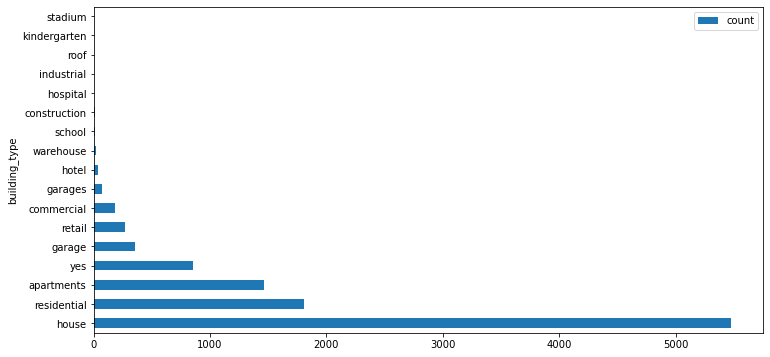

In [50]:
df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

Finally, I can create the map that will show me the building footprint near SoFi stadium and the surrounding neighborhoods.

I begin by making sure that the osm data is a gepdataframe so that it can map the information, and then I plot it.

In [51]:
type(osm)

geopandas.geodataframe.GeoDataFrame

(-118.354904765, -118.318341535, 33.93544872, 33.96573568)

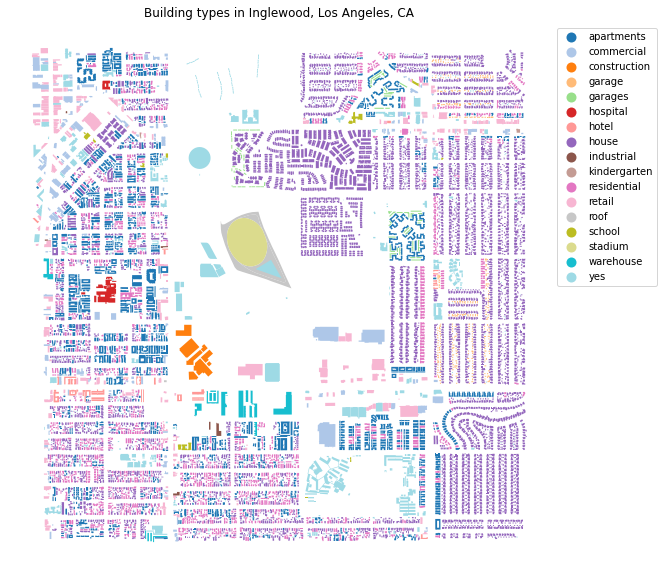

In [52]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.set_title('Building types in ' + address)

ax.axis('off')

According to OSM, this is the current building footprint for the surrounding areas near SoFi Stadium.

### LA County Assessor Data - 2020
I have the building footprint for Inglewood, but now I want to look closely at the various types of buildings that exist in Inglewood according to the data from the county assessor. This will allow me to create maps for the individual types of buildings based on 2020 open source data from the LA County Assessor.

I begin by importing additional libraries that I will need to generate these maps.

In [53]:
# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

In [54]:
client = Socrata("data.lacounty.gov", None)

results = client.get("42ne-gwcj",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2020")

df = pd.DataFrame.from_records(results)

df.sample(1)

/tmp/ipykernel_58/2978694129.py:1: ResourceWarning:

unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('10.12.10.146', 54818), raddr=('52.206.140.205', 443)>



usecodedescchar1 roll_homeownersexemp recordingdate effectiveyearbuilt  \
6113      Residential                 7000      20170424               1944   

     istaxableparcel roll_totlandimp roll_perspropexemp  \
6113               Y           96315                  0   

     parcelboundarydescription roll_landbaseyear roll_impbaseyear  ...  \
6113    TRACT # 10160 LOT   11              1978             1978  ...   

     usecodedescchar4     situscity usecodedescchar3  \
6113              NaN  INGLEWOOD CA              NaN   

                              propertylocation   situsstreet situszip5  \
6113  8105 S VAN NESS AVE  INGLEWOOD CA  90305  VAN NESS AVE     90305   

     situsdirection    situszip situsunit situsfraction  
6113              S  90305-1544       NaN           NaN  

[1 rows x 51 columns]

In [55]:
df.shape

(21240, 51)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21240 entries, 0 to 21239
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   usecodedescchar1           21240 non-null  object
 1   roll_homeownersexemp       21240 non-null  object
 2   recordingdate              21240 non-null  object
 3   effectiveyearbuilt         21240 non-null  object
 4   istaxableparcel            21240 non-null  object
 5   roll_totlandimp            21240 non-null  object
 6   roll_perspropexemp         21240 non-null  object
 7   parcelboundarydescription  21240 non-null  object
 8   roll_landbaseyear          21240 non-null  object
 9   roll_impbaseyear           21240 non-null  object
 10  usetype                    21235 non-null  object
 11  cluster                    21240 non-null  object
 12  adminregion                21240 non-null  object
 13  roll_fixtureexemp          21240 non-null  object
 14  nettax

I want to create a graph of the building types in Inglewood in 2020 so that I can see what type of buildings exist in the city and how many of each.

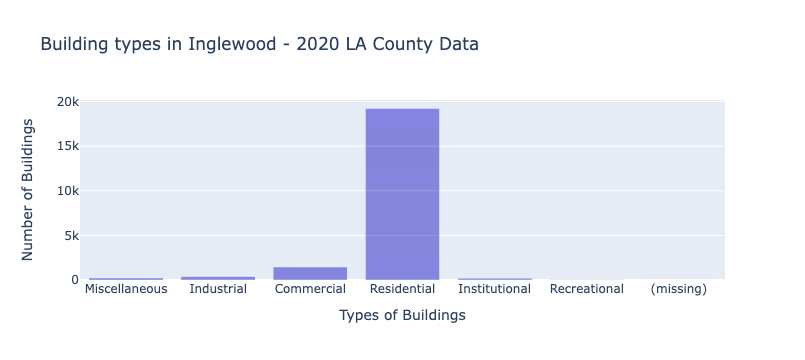

In [57]:
fig = px.bar(
        df,
        x='usecodedescchar1',
        title='Building types in Inglewood - 2020 LA County Data',
        labels={
            'usecodedescchar1':'Types of Buildings',
            'count':'Number of Buildings'
        }
)

fig.update_traces(marker_line_width=0)

fig.show()

I have my bar graph of the data, but now I wish to map it. I create a geodataframe so that I am import to crs so that I am able to create a map that will show me each point for each building type.

In [58]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.center_lon, df.center_lat))

In [59]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

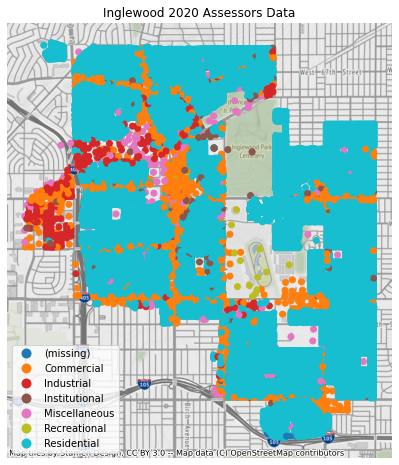

In [60]:
fig, ax = plt.subplots(figsize=(8,8))

gdf_web_mercator.plot(ax=ax,
                      column='usecodedescchar1',
                    categorical=True,
                    legend=True)

ax.axis('off')

ax.set_title('Inglewood 2020 Assessors Data')

ctx.add_basemap(ax)

I can also recreate this static map and make it an interactive map. In the upcoming cells I organize my data accordingly and change the dtypes for my longitude and latitude columns so that I can produce the interactive map.

In [61]:
df_mini = df[['ain','usecodedescchar1','effectiveyearbuilt','roll_impvalue','center_lat','center_lon']]

In [62]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21240 entries, 0 to 21239
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ain                 21240 non-null  object
 1   usecodedescchar1    21240 non-null  object
 2   effectiveyearbuilt  21240 non-null  object
 3   roll_impvalue       21240 non-null  object
 4   center_lat          21237 non-null  object
 5   center_lon          21237 non-null  object
dtypes: object(6)
memory usage: 995.8+ KB


In [63]:
df_mini['center_lat'] = df_mini['center_lat'].astype(float)
df_mini['center_lon'] = df_mini['center_lon'].astype(float)
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21240 entries, 0 to 21239
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ain                 21240 non-null  object 
 1   usecodedescchar1    21240 non-null  object 
 2   effectiveyearbuilt  21240 non-null  object 
 3   roll_impvalue       21240 non-null  object 
 4   center_lat          21237 non-null  float64
 5   center_lon          21237 non-null  float64
dtypes: float64(2), object(4)
memory usage: 995.8+ KB


/tmp/ipykernel_58/1363317119.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_58/1363317119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



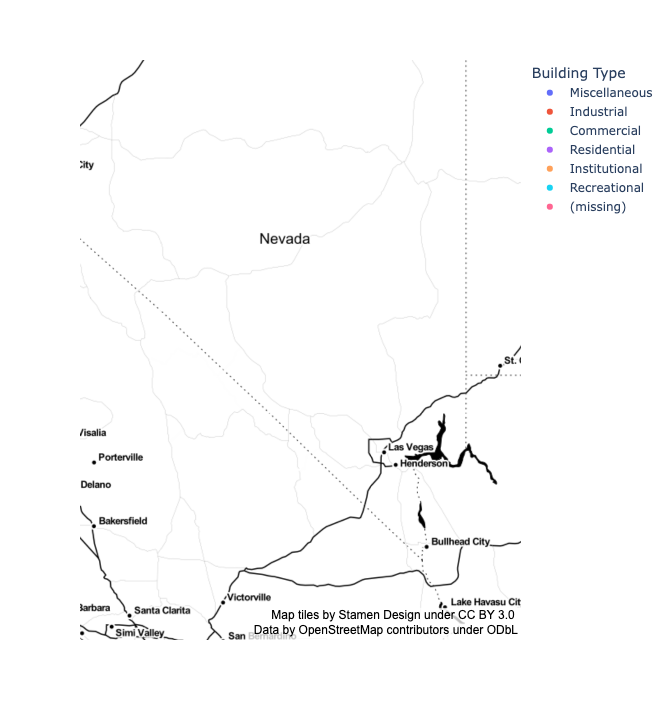

In [64]:
fig = px.scatter_mapbox(df_mini, 
                        lat="center_lat", 
                        lon="center_lon", 
                        color="usecodedescchar1",
                        labels={'usecodedescchar1':'Building Type'}
                       )

fig.update_layout(mapbox_style="stamen-toner")

fig.show()

I can create addititonal maps that will only show me the point for each individual building type. To do this, I will need to create a new variable, create a function to create a loop and map each building type data.

In [65]:
building_type_list = df_mini.usecodedescchar1.unique().tolist()
building_type_list

['Miscellaneous',
 'Industrial',
 'Commercial',
 'Residential',
 'Institutional',
 'Recreational',
 '(missing)']

In [66]:
def building_map(building='Residential'):
    
    fig = px.scatter_mapbox(
                            df_mini[df_mini.usecodedescchar1==building], 
                            lat="center_lat", 
                            lon="center_lon", 
                            color="usecodedescchar1",
                            labels={'usecodedescchar1':'Building Type'}
                           )

    fig.update_layout(mapbox_style="stamen-toner")

    fig.show()

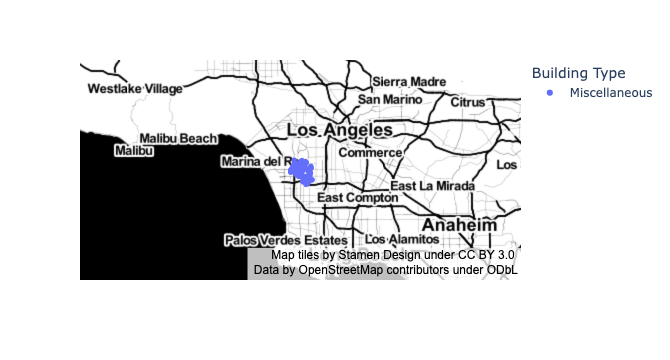

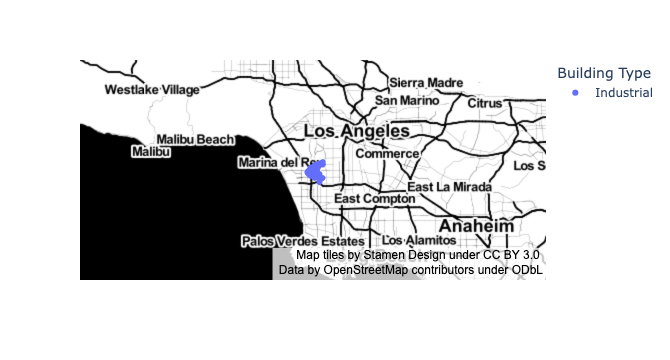

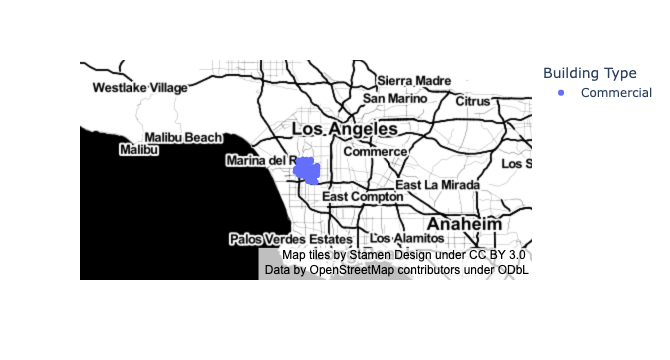

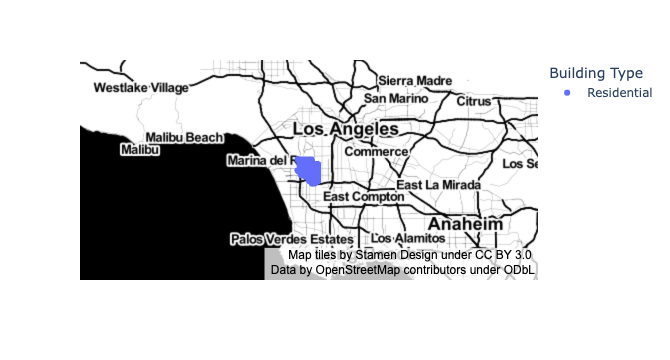

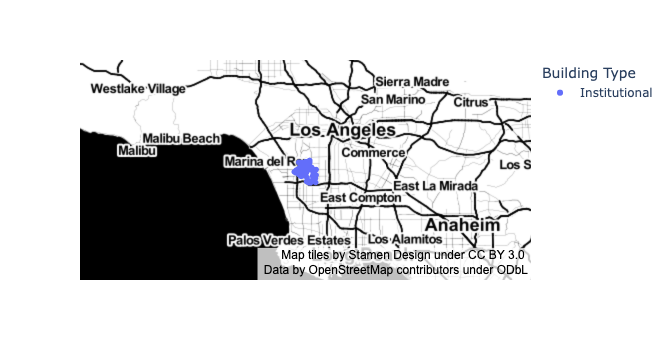

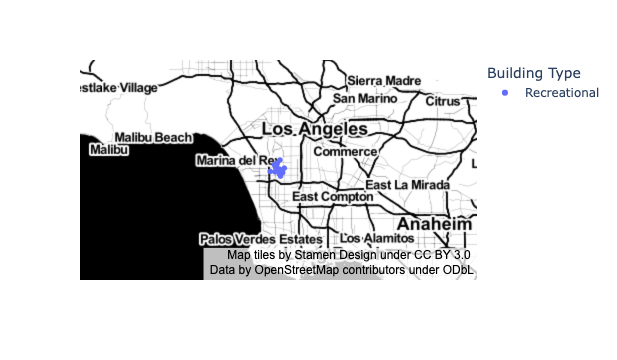

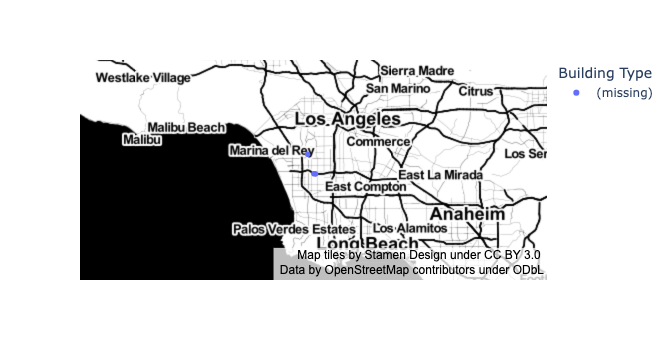

In [67]:
for building in building_type_list:
    building_map(building)

Some additional information that I was curious about is the effective year build date. This refers to the latest year that a building either hosted cosntruction or experiecned some modifications. First, I want to see all the years lissted in the data.

In [68]:
df.effectiveyearbuilt.unique().tolist()

['0',
 '1971',
 '1944',
 '1965',
 '1957',
 '1949',
 '1950',
 '1928',
 '1941',
 '1951',
 '1948',
 '1967',
 '1963',
 '1947',
 '1940',
 '1939',
 '1943',
 '1935',
 '1953',
 '1942',
 '1961',
 '1956',
 '1936',
 '1931',
 '1927',
 '1946',
 '1973',
 '1988',
 '1945',
 '1980',
 '1960',
 '1933',
 '1926',
 '1958',
 '1970',
 '1937',
 '1929',
 '1938',
 '1964',
 '1959',
 '1985',
 '1930',
 '1955',
 '1934',
 '1962',
 '1968',
 '2007',
 '1954',
 '1978',
 '1952',
 '2000',
 '1974',
 '1977',
 '1969',
 '1925',
 '1995',
 '2015',
 '1975',
 '1986',
 '1994',
 '1999',
 '1982',
 '1976',
 '2005',
 '1984',
 '1932',
 '1966',
 '1979',
 '1987',
 '1981',
 '1972',
 '1922',
 '2009',
 '2004',
 '2017',
 '1924',
 '1921',
 '2018',
 '1989',
 '1916',
 '1923',
 '2006',
 '1990',
 '1983',
 '2012',
 '1993',
 '1991',
 '2003',
 '1992',
 '1906',
 '2019',
 '1917',
 '1918',
 '1996',
 '1997',
 '1908',
 '1911',
 '1909',
 '1907',
 '1919',
 '1998',
 '2008',
 '2002',
 '2016',
 '1899',
 '2013',
 '1912',
 '2001',
 '1913',
 '2014',
 '1910',
 '19

Now I can sort the data to show me how many buildings were either modified or experienced some form of cosntruction for each year.

In [69]:
building_by_year_sorted = df.sort_values(by='effectiveyearbuilt',ascending = False)

In [70]:
building_by_year_sorted = df.effectiveyearbuilt.value_counts().reset_index()
building_by_year_sorted

index  effectiveyearbuilt
0    1955                 681
1       0                 653
2    1940                 639
3    1964                 633
4    1956                 633
..    ...                 ...
112  1907                   3
113  1909                   2
114  1906                   2
115  1899                   1
116  1902                   1

[117 rows x 2 columns]

I create a bar graph to show me the tail end of the data because thi spart of data shows me the years that would be most relevant to the reserach.

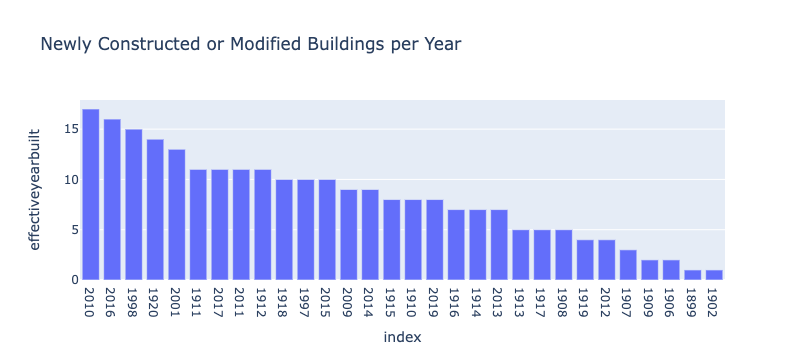

In [71]:
fig = px.bar(building_by_year_sorted.tail(30),
       x='index',
       y='effectiveyearbuilt',
       title='Newly Constructed or Modified Buildings per Year')

fig.show()

#### Income Profile for Inglewood - 2019 Census Reporter Data

Now that I have visualized the property data from the LA County Assesor, I can begin to explore the income characteristics of the city. This will be sort of an intro to the next part of our research which will be carried out to the final assignment. We will most likely need to consider non-physical data and factors such as property values and demographics to see how each trend might coincide with one another. 

I will explore various income groups, but primarily I will want to see which census tracts have the highes concentration of households living in poverty.

I begin by importing the data from census reporter.

In [72]:
income = gpd.read_file('Data/Income Data Inglewood 2019_Censustract.geojson')

In [73]:
income.shape

(33, 37)

In [74]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             33 non-null     object  
 1   name              33 non-null     object  
 2   B19001001         33 non-null     float64 
 3   B19001001, Error  33 non-null     float64 
 4   B19001002         33 non-null     float64 
 5   B19001002, Error  33 non-null     float64 
 6   B19001003         33 non-null     float64 
 7   B19001003, Error  33 non-null     float64 
 8   B19001004         33 non-null     float64 
 9   B19001004, Error  33 non-null     float64 
 10  B19001005         33 non-null     float64 
 11  B19001005, Error  33 non-null     float64 
 12  B19001006         33 non-null     float64 
 13  B19001006, Error  33 non-null     float64 
 14  B19001007         33 non-null     float64 
 15  B19001007, Error  33 non-null     float64 
 16  B19001008         33

In [75]:
income.tail()

geoid                                   name  B19001001  \
28  14000US06037602003  Census Tract 6020.03, Los Angeles, CA     1258.0   
29  14000US06037602004  Census Tract 6020.04, Los Angeles, CA     1052.0   
30  14000US06037602104  Census Tract 6021.04, Los Angeles, CA     1739.0   
31  14000US06037703002  Census Tract 7030.02, Los Angeles, CA     2859.0   
32      16000US0636546                          Inglewood, CA    35997.0   

    B19001001, Error  B19001002  B19001002, Error  B19001003  \
28              59.0        0.0              12.0       92.0   
29              40.0       18.0              20.0       54.0   
30              50.0      126.0              79.0      136.0   
31             150.0      200.0             142.0       66.0   
32             780.0     2347.0             331.0     1872.0   

    B19001003, Error  B19001004  B19001004, Error  ...  B19001013, Error  \
28              61.0       57.0              40.0  ...              72.0   
29              44.0       86.0              48.0  ...              62.0   
30              79.0      106.0              67.0  ...              67.0   
31              82.0       87.0              77.0  ...             127.0   
32             287.0     1712.0             314.0  ...             444.0   

    B19001014  B19001014, Error  B19001015  B19001015, Error  B19001016  \
28       26.0              29.0       28.0              33.0       76.0   
29       78.0              50.0       57.0              34.0        8.0   
30      170.0              91.0        6.0              11.0       87.0   
31      330.0             142.0      130.0              75.0      298.0   
32     2905.0             365.0     1854.0             281.0     1796.0   

    B19001016, Error  B19001017  B19001017, Error  \
28              66.0       51.0              38.0   
29              12.0       32.0              34.0   
30              79.0       48.0              42.0   
31             151.0      712.0             190.0   
32             210.0     1410.0             259.0   

                                             geometry  
28  MULTIPOLYGON (((-118.34390 33.93581, -118.3439...  
29  MULTIPOLYGON (((-118.33514 33.93102, -118.3351...  
30  MULTIPOLYGON (((-118.35247 33.93006, -118.3524...  
31  MULTIPOLYGON (((-118.38655 33.97716, -118.3862...  
32  MULTIPOLYGON (((-118.37625 33.98285, -118.3762...  

[5 rows x 37 columns]

In [76]:
income = income.drop([32]) 

In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

income.sample()

geoid                                   name  B19001001  \
23  14000US06037601501  Census Tract 6015.01, Los Angeles, CA     1084.0   

    B19001001, Error  B19001002  B19001002, Error  B19001003  \
23              51.0       60.0              48.0       49.0   

    B19001003, Error  B19001004  B19001004, Error  B19001005  \
23              50.0      128.0              79.0       45.0   

    B19001005, Error  B19001006  B19001006, Error  B19001007  \
23              40.0       48.0              49.0      121.0   

    B19001007, Error  B19001008  B19001008, Error  B19001009  \
23              84.0       65.0              60.0       56.0   

    B19001009, Error  B19001010  B19001010, Error  B19001011  \
23              44.0       72.0              56.0      203.0   

    B19001011, Error  B19001012  B19001012, Error  B19001013  \
23              89.0       75.0              49.0       77.0   

    B19001013, Error  B19001014  B19001014, Error  B19001015  \
23              62.0       37.0              32.0       30.0   

    B19001015, Error  B19001016  B19001016, Error  B19001017  \
23              28.0       18.0              20.0        0.0   

    B19001017, Error                                           geometry  
23              12.0  MULTIPOLYGON (((-118.37004 33.94486, -118.3700...

I need to rename the columns in the data so that they make sense. I begin the process by generating the name list of all the columns in the data.

In [78]:
list(income)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

Now I can remove the error columns that I will not need for this dataframe.

In [79]:
columns_sorted = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',                 
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

Now I can set my income variable to only take into account, the sorted columns and then rename each column accordingly.

In [80]:
income = income[columns_sorted]

In [81]:
income.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to 14,999',
 '$15,000 to 19,999',
 '$20,000 to 24,999',
 '$25,000 to 29,999',
 '$30,000 to 34,999',
 '$35,000 to 39,999',
 '$40,000 to 44,999',
 '$45,000 to 49,999',                
 '$50,000 to 59,999',
 '$60,000 to 74,999',
 '$75,000 to 99,999',
 '$100,000 to 124,999',
 '$125,000 to 149,999', 
 '$150,000 to 199,999',
 '$200,000 or more',
 'geometry']

I also want to group certain income levels so that the data is easier to read/follow. I bucket each income group according to the cell below:

In [82]:
income['less than $20,000'] = income['Less than $10,000'] + income['$10,000 to 14,999'] + income['$15,000 to 19,999'] 
income['$20,000 to 39,999'] =  income['$20,000 to 24,999'] + income['$25,000 to 29,999'] + income['$30,000 to 34,999'] + income['$35,000 to 39,999']
income['$40,000 to 59,999'] = income['$40,000 to 44,999'] + income['$45,000 to 49,999'] + income['$50,000 to 59,999']
income['$60,000 to 99,999'] = income['$60,000 to 74,999'] + income['$75,000 to 99,999']
income['$100,000 to 149,999'] = income['$100,000 to 124,999'] + income['$125,000 to 149,999']
income['$150,000 and above'] = income['$150,000 to 199,999'] + income['$200,000 or more']

In [83]:
income.head()

geoid                                   name   Total  \
0  14000US06037600501  Census Tract 6005.01, Los Angeles, CA   871.0   
1  14000US06037600502  Census Tract 6005.02, Los Angeles, CA   635.0   
2  14000US06037600601  Census Tract 6006.01, Los Angeles, CA   920.0   
3  14000US06037600602  Census Tract 6006.02, Los Angeles, CA   696.0   
4  14000US06037600702  Census Tract 6007.02, Los Angeles, CA  1402.0   

   Less than $10,000  $10,000 to 14,999  $15,000 to 19,999  $20,000 to 24,999  \
0               27.0               27.0               43.0               45.0   
1               25.0               17.0                6.0               38.0   
2               22.0               37.0               32.0               16.0   
3               67.0               46.0               64.0               34.0   
4               91.0               56.0               10.0               36.0   

   $25,000 to 29,999  $30,000 to 34,999  $35,000 to 39,999  $40,000 to 44,999  \
0               11.0               50.0               22.0               33.0   
1                8.0               32.0               32.0                5.0   
2               37.0               30.0               60.0               35.0   
3               19.0               64.0               42.0               35.0   
4               10.0               76.0               28.0               23.0   

   $45,000 to 49,999  $50,000 to 59,999  $60,000 to 74,999  $75,000 to 99,999  \
0               35.0               63.0              112.0               93.0   
1               46.0               38.0              114.0               24.0   
2               13.0               53.0               88.0              191.0   
3               33.0               72.0               70.0               56.0   
4               33.0               79.0              113.0              150.0   

   $100,000 to 124,999  $125,000 to 149,999  $150,000 to 199,999  \
0                110.0                 49.0                 92.0   
1                105.0                 45.0                 69.0   
2                 91.0                 74.0                113.0   
3                 36.0                 33.0                 12.0   
4                142.0                189.0                196.0   

   $200,000 or more                                           geometry  \
0              59.0  MULTIPOLYGON (((-118.32642 33.93293, -118.3264...   
1              31.0  MULTIPOLYGON (((-118.33737 33.92796, -118.3373...   
2              28.0  MULTIPOLYGON (((-118.32641 33.93870, -118.3264...   
3              13.0  MULTIPOLYGON (((-118.33516 33.94108, -118.3351...   
4             170.0  MULTIPOLYGON (((-118.34393 33.95271, -118.3439...   

   less than $20,000  $20,000 to 39,999  $40,000 to 59,999  $60,000 to 99,999  \
0               97.0              128.0              131.0              205.0   
1               48.0              110.0               89.0              138.0   
2               91.0              143.0              101.0              279.0   
3              177.0              159.0              140.0              126.0   
4              157.0              150.0              135.0              263.0   

   $100,000 to 149,999  $150,000 and above  
0                159.0               151.0  
1                150.0               100.0  
2                165.0               141.0  
3                 69.0                25.0  
4                331.0               366.0

I have new columns and new income groups in the data frame, so I will remove the previous ones that I will not be using.

In [84]:
new_columns_to_keep = ['geoid',        # These are the columns I am deciding to keep
    'name',
    'Total',
    'less than $20,000',                   
    '$20,000 to 39,999',
    '$40,000 to 59,999',
    '$60,000 to 99,999',
    '$100,000 to 149,999',
    '$150,000 and above',                   
    'geometry']

In [85]:
income = income[new_columns_to_keep]
income.sample()

geoid                                   name   Total  \
20  14000US06037601303  Census Tract 6013.03, Los Angeles, CA  2075.0   

    less than $20,000  $20,000 to 39,999  $40,000 to 59,999  \
20              310.0              511.0              425.0   

    $60,000 to 99,999  $100,000 to 149,999  $150,000 and above  \
20              472.0                302.0                55.0   

                                             geometry  
20  MULTIPOLYGON (((-118.36682 33.97702, -118.3662...

I am curious to see which census tracts are the most populted so I run a code to give me the total number of households beginning with the highest count.

In [86]:
income_sorted = income.sort_values(by='Total',ascending = False)

In [87]:
income_sorted[['geoid','Total']].head(10)

geoid   Total
31  14000US06037703002  2859.0
19  14000US06037601302  2795.0
9   14000US06037600902  2375.0
14  14000US06037601100  2104.0
20  14000US06037601303  2075.0
17  14000US06037601212  2068.0
13  14000US06037601002  1894.0
30  14000US06037602104  1739.0
21  14000US06037601401  1728.0
11  14000US06037600912  1447.0

I plot the census tracts with the highes number of households to gain a better understasndign where the highest concentration of households are located.

<AxesSubplot:>

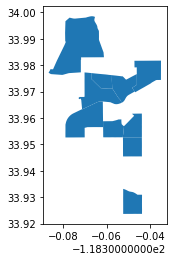

In [88]:
income_sorted.head(10).plot()

I can now begin exploring certain income groups. I begin with households that earn under $20,000. I wish to see which census tracts have the highes total households under this category.

<AxesSubplot:>

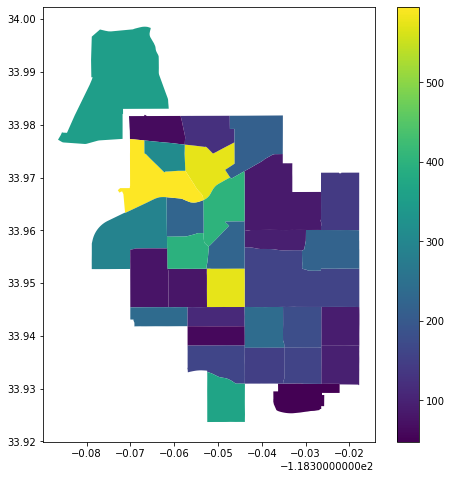

In [89]:
income.plot(figsize=(8,8),column='less than $20,000',legend=True)

This is good information but I want to compare within each census tract I will need to normalize the data. I create new columns that will show the percentage of each income group in each census tract.

In [90]:
income['Percent Less than $20,000'] = income['less than $20,000']/income['Total']*100
income['Percent $20,000 to 39,999'] = income['$20,000 to 39,999']/income['Total']*100
income['Percent $40,000 to 59,999'] = income['$40,000 to 59,999']/income['Total']*100
income['Percent $60,000 to 99,999'] = income['$60,000 to 99,999']/income['Total']*100
income['Percent $100,000 to 149,999'] = income['$100,000 to 149,999']/income['Total']*100
income['Percent $150,000 and above'] = income['$150,000 and above']/income['Total']*100

I can now map and compare two different levels of income and see the various percentages for each group by census tract.

Text(0.5, 1.0, 'Percent $60,000 to 99,999 Income Range')

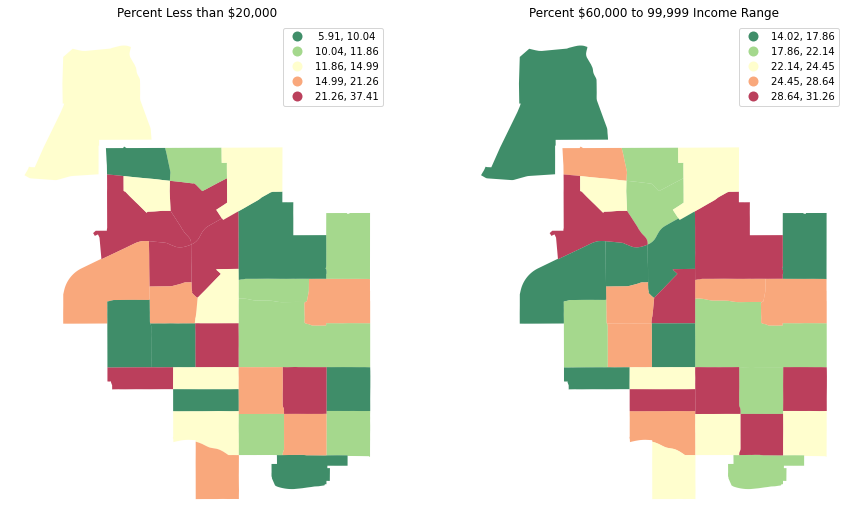

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

income.plot(column='Percent Less than $20,000', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Less than $20,000")

income.plot(column='Percent $60,000 to 99,999', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent $60,000 to 99,999 Income Range")

I was curious to see which census tracts have higher concentrations of housholds living in poverty so, I create a new data frame to show me census tracts in which over %25 of the population earned undeer $20,000.

In [92]:
income[income['Percent Less than $20,000'] > 25]

geoid                                   name   Total  \
3   14000US06037600602  Census Tract 6006.02, Los Angeles, CA   696.0   
12  14000US06037601001  Census Tract 6010.01, Los Angeles, CA  1072.0   
14  14000US06037601100     Census Tract 6011, Los Angeles, CA  2104.0   

    less than $20,000  $20,000 to 39,999  $40,000 to 59,999  \
3               177.0              159.0              140.0   
12              401.0              207.0               82.0   
14              574.0              571.0              364.0   

    $60,000 to 99,999  $100,000 to 149,999  $150,000 and above  \
3               126.0                 69.0                25.0   
12              189.0                152.0                41.0   
14              304.0                193.0                98.0   

                                             geometry  \
3   MULTIPOLYGON (((-118.33516 33.94108, -118.3351...   
12  MULTIPOLYGON (((-118.35337 33.96539, -118.3533...   
14  MULTIPOLYGON (((-118.35256 33.95271, -118.3525...   

    Percent Less than $20,000  Percent $20,000 to 39,999  \
3                   25.431034                  22.844828   
12                  37.406716                  19.309701   
14                  27.281369                  27.138783   

    Percent $40,000 to 59,999  Percent $60,000 to 99,999  \
3                   20.114943                  18.103448   
12                   7.649254                  17.630597   
14                  17.300380                  14.448669   

    Percent $100,000 to 149,999  Percent $150,000 and above  
3                      9.913793                    3.591954  
12                    14.179104                    3.824627  
14                     9.173004                    4.657795

In [93]:
income_web_mercator = income.to_crs(epsg=3857)

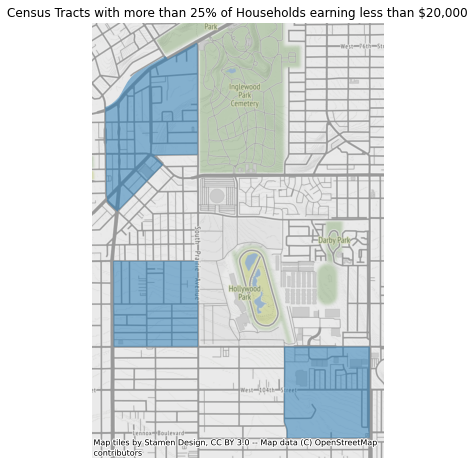

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))

income_web_mercator[income_web_mercator['Percent Less than $20,000'] > 25 ].plot(ax=ax, alpha=0.5)

ax.axis('off')

ax.set_title('Census Tracts with more than 25% of Households earning less than $20,000',fontsize=12)

ctx.add_basemap(ax)

#### Conclusion
After reviewing the maps and charts created, and comparing with my partner, we notice that the physical changes are not as significant as we had hypothesized. However, it does not diminish our work so far. Instead, it guides us right into the second part of our research: analyzing non physical components of the parcel data such as property values and social demographic changes. 

It is possible that the impacts of SoFi have not developed physically yet given relative short amount of time it has been operating,but other factors that lead to these changes might already be ongoing such as changes in property value and demographics.


#### Group Dynamics:
Luis and I essentially did the same work in terms of coding, but we divided our work by the two years we decided to compare. We created our individual notebooks and used the outputs we were able to create to compare building footprint and building types in Inglewood. The process required us to both search for datasets that interested us. Luis came acorss LA County Data and we decided to use the LA County Assessor Data since it allowed us to grab data from 2006 onward, which gave us the ability to have parcel data for a wide range of years to choose for a comparison. I also made updates to our project proposal as needed throughout the weeks.